In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import random
import time
from model.FittingTree import *
from model.MET import *
from model.MET_Meta import *
from model.FT_Meta import *

In [2]:
datafile = open('./data/lognormal.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)
gaps = np.diff(data)

100%|██████████| 18500001/18500001 [00:16<00:00, 1105183.95it/s]


In [3]:
epsilon_list = list(range(25,400,25))
FT_Index_seg_num = []
FT_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    FT_Index = FT(epsilon)
    FT_Index.learn_index(data)
    FT_Index_seg_num.append(FT_Index.seg_num)
    FT_Index_mae.append(FT_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [00:25<00:00, 722343.97it/s]


12688 5.999506000026702


100%|██████████| 18500001/18500001 [00:25<00:00, 736224.52it/s]


3381 11.945809138064371


  0%|          | 87137/18500001 [00:00<00:21, 871362.52it/s]

1533 17.864561737050717


  0%|          | 45610/18500001 [00:00<00:40, 456098.26it/s]

887 23.6718410988194


  0%|          | 46972/18500001 [00:00<00:39, 469713.73it/s]

574 29.887431519598294


  0%|          | 53210/18500001 [00:00<00:34, 532095.43it/s]

404 35.86257125067183


100%|██████████| 18500001/18500001 [00:29<00:00, 626456.32it/s]


303 41.99295286524579


100%|██████████| 18500001/18500001 [00:29<00:00, 633504.88it/s]


237 47.46235332635928


  0%|          | 46774/18500001 [00:00<00:39, 467735.99it/s]

189 52.993807135469886


  0%|          | 46610/18500001 [00:00<00:39, 466092.67it/s]

147 58.93821459793435


100%|██████████| 18500001/18500001 [00:30<00:00, 607575.17it/s]


123 64.61861434493977


  0%|          | 45000/18500001 [00:00<00:41, 449991.85it/s]

116 70.52633883641411


  0%|          | 71417/18500001 [00:00<00:25, 714167.28it/s]

98 76.17463242299284


100%|██████████| 18500001/18500001 [00:31<00:00, 584307.99it/s]


90 80.54047261943391


100%|██████████| 18500001/18500001 [00:30<00:00, 604583.43it/s]


82 86.0296958902867


-29.602812891701856

In [4]:
FT_Meta_Index_seg_num_withBound = []
FT_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Meta_Index = FT_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_Meta_Index.learn_index_lookahead(data)
    FT_Meta_Index_seg_num_withBound.append(FT_Meta_Index.seg_num)
    FT_Meta_Index_mae_withBound.append(FT_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [00:30<00:00, 611306.52it/s]


9593 6.0157012964485785


100%|██████████| 18500001/18500001 [00:29<00:00, 624863.18it/s]


2317 12.520659323207605


100%|██████████| 18500001/18500001 [00:28<00:00, 644610.97it/s]


967 18.944826705685042


100%|██████████| 18500001/18500001 [00:29<00:00, 630937.58it/s]


538 25.589590022184325


100%|██████████| 18500001/18500001 [00:29<00:00, 633900.04it/s]


345 31.850605305372685


100%|██████████| 18500001/18500001 [00:31<00:00, 592155.69it/s]


240 38.9759118391399


100%|██████████| 18500001/18500001 [00:31<00:00, 582002.00it/s]


159 46.5020949458327


100%|██████████| 18500001/18500001 [00:32<00:00, 566646.18it/s]


132 54.52653705261962


100%|██████████| 18500001/18500001 [00:30<00:00, 610558.87it/s]


99 60.741068608590886


100%|██████████| 18500001/18500001 [00:30<00:00, 599741.47it/s]


86 68.0761149148046


100%|██████████| 18500001/18500001 [00:29<00:00, 628545.71it/s]


74 77.0728158879559


100%|██████████| 18500001/18500001 [00:30<00:00, 615568.18it/s]


64 84.6617765588229


100%|██████████| 18500001/18500001 [00:32<00:00, 576010.49it/s]


56 93.98691216286961


100%|██████████| 18500001/18500001 [00:30<00:00, 603693.02it/s]


52 100.01689508016783


100%|██████████| 18500001/18500001 [00:30<00:00, 608934.97it/s]


49 109.05377107817453


-33.794666733841105

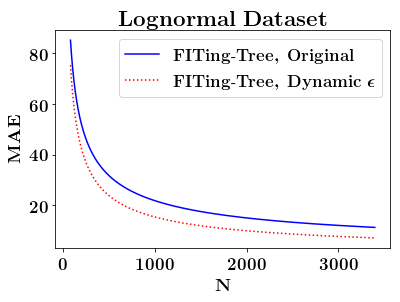

In [8]:
x = np.arange(80,3400)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Lognormal~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound[:],FT_Meta_Index_mae_withBound[:])
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{FITing\mbox{-}Tree,~Original}$')
#plt.scatter(FT_Index_seg_num[1:], FT_Index_mae[1:],c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{FITing\mbox{-}Tree,~Dynamic~\epsilon}$')
#plt.scatter(FT_Meta_Index_seg_num_withBound[1:-2], FT_Meta_Index_mae_withBound[1:-2],c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/FITingTree/Lognormal_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [6]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(68432.2563942578, 49105.01062990943, 0.28242888343471495)

In [7]:
FT_Random_Index_seg_num = []
FT_Random_Index_mae = []
starttime = time.perf_counter()
epsilon_high_list = list(range(50,700,100))
for i in range(len(epsilon_high_list)):
    FT_Random_Index = FT_Random(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=epsilon_high_list[i],withBound=True)
    FT_Random_Index.learn_index_lookahead(data)
    FT_Random_Index_seg_num.append(FT_Random_Index.seg_num)
    FT_Random_Index_mae.append(FT_Random_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [00:24<00:00, 741248.75it/s]


10051 8.599172454098786


100%|██████████| 18500001/18500001 [00:24<00:00, 742975.57it/s]


1196 26.177533341754955


100%|██████████| 18500001/18500001 [00:24<00:00, 749690.42it/s]


425 43.18546350348846


100%|██████████| 18500001/18500001 [00:24<00:00, 751907.08it/s]


256 55.58775337363495


100%|██████████| 18500001/18500001 [00:24<00:00, 754048.89it/s]


182 69.66168531558458


100%|██████████| 18500001/18500001 [00:24<00:00, 750213.41it/s]


119 82.5192200259881


100%|██████████| 18500001/18500001 [00:24<00:00, 748200.97it/s]


87 105.2353776088985


-12.810817850877841

In [10]:
FT_Poly_Index_seg_num = []
FT_Poly_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Poly_Index = FT_Poly(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_Poly_Index.learn_index_lookahead(data)
    FT_Poly_Index_seg_num.append(FT_Poly_Index.seg_num)
    FT_Poly_Index_mae.append(FT_Poly_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [03:14<00:00, 95032.69it/s] 


7191 10.127077452590408


100%|██████████| 18500001/18500001 [00:31<00:00, 588440.03it/s]


1513 19.137859614169752


100%|██████████| 18500001/18500001 [00:26<00:00, 693016.59it/s]


842 25.291812362604738


100%|██████████| 18500001/18500001 [00:25<00:00, 730625.80it/s]


528 31.6371065601564


100%|██████████| 18500001/18500001 [00:25<00:00, 732989.64it/s]


416 36.14382728952285


100%|██████████| 18500001/18500001 [00:25<00:00, 736675.50it/s]


337 40.2687154449343


100%|██████████| 18500001/18500001 [00:25<00:00, 737914.61it/s]


291 43.43879867898386


100%|██████████| 18500001/18500001 [00:24<00:00, 741544.43it/s]


239 46.453245056581345


100%|██████████| 18500001/18500001 [00:24<00:00, 746700.28it/s]


202 50.8717937366598


100%|██████████| 18500001/18500001 [00:24<00:00, 753860.91it/s]


155 58.57961699569638


  2%|▏         | 457631/18500001 [00:00<00:19, 918877.25it/s]


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [6]:
FT_LS_Index_seg_num = []
FT_LS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_LS_Index = FT_LS(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_LS_Index.learn_index_lookahead(data)
    FT_LS_Index_seg_num.append(FT_LS_Index.seg_num)
    FT_LS_Index_mae.append(FT_LS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [03:45<00:00, 82057.17it/s] 


5375 7.827689036341133


100%|██████████| 18500001/18500001 [00:59<00:00, 313356.96it/s]


1412 15.926948706651421


100%|██████████| 18500001/18500001 [00:40<00:00, 453966.89it/s]


637 23.672869693358393


100%|██████████| 18500001/18500001 [00:31<00:00, 594097.13it/s]


363 30.72112066372321


100%|██████████| 18500001/18500001 [00:30<00:00, 606829.89it/s]


235 38.236537554781755


100%|██████████| 18500001/18500001 [00:28<00:00, 656847.67it/s]


159 47.72650601478346


100%|██████████| 18500001/18500001 [00:29<00:00, 631490.03it/s]


132 54.389563708672235


100%|██████████| 18500001/18500001 [00:26<00:00, 689499.83it/s]


94 62.40003046486322


100%|██████████| 18500001/18500001 [00:26<00:00, 695329.45it/s]


78 75.62920996598865


100%|██████████| 18500001/18500001 [00:25<00:00, 731080.95it/s]


65 86.22342171765288


100%|██████████| 18500001/18500001 [00:26<00:00, 710748.59it/s]


61 84.40907424815815


100%|██████████| 18500001/18500001 [00:25<00:00, 724820.36it/s]


57 96.43760651688613


100%|██████████| 18500001/18500001 [00:25<00:00, 724781.74it/s]


49 108.54085953833192


100%|██████████| 18500001/18500001 [00:25<00:00, 723437.33it/s]


46 123.30588555103321


100%|██████████| 18500001/18500001 [00:25<00:00, 734926.22it/s]


42 134.64731904609087


-46.299851989994444

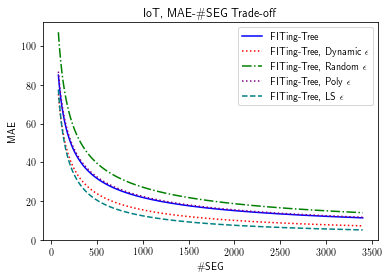

In [13]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('IoT, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(80,3400)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
p3,_ = curve_fit(func,FT_Random_Index_seg_num,FT_Random_Index_mae)
p4,_ = curve_fit(func,FT_Poly_Index_seg_num,FT_Poly_Index_mae)
p5,_ = curve_fit(func,FT_LS_Index_seg_num,FT_LS_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
#plt.scatter(FT_Index_seg_num[:], FT_Index_mae[:],c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
#plt.scatter(FT_Meta_Index_seg_num_withBound[:], FT_Meta_Index_mae_withBound[:],c=colors[1],marker=markers[1])
plt.plot(x,p3[0]*x**p3[1],c=colors[2], linestyle=linestyles[2], label='FITing-Tree, Random $\epsilon$')
#plt.scatter(FT_Random_Index_seg_num[:], FT_Random_Index_mae[:],c=colors[2],marker=markers[2])
plt.plot(x,p4[0]*x**p4[1],c=colors[3], linestyle=linestyles[3], label='FITing-Tree, Poly $\epsilon$')
#plt.scatter(FT_Poly_Index_seg_num[:], FT_Poly_Index_mae[:],c=colors[3],marker=markers[3])
plt.plot(x,p5[0]*x**p5[1],c=colors[4], linestyle=linestyles[4], label='FITing-Tree, LS $\epsilon$')
#plt.scatter(FT_LS_Index_seg_num[:], FT_LS_Index_mae[:],c=colors[4],marker=markers[4])
plt.legend()

In [14]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC4 = calc_AUC(x,p4[0]*x**p4[1])
AUC5 = calc_AUC(x,p5[0]*x**p5[1])
AUC_list = [AUC1,AUC2,AUC3,AUC4,AUC5]
for i in range(2,5):
    print(AUC_list[i]/AUC_list[1]-1)

0.7338540479476048
0.42770062023170463
-0.17634338921202175
